In [164]:
import numpy as np
import pandas as pd
import seaborn as sns

In [165]:
df = sns.load_dataset('iris')

In [166]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [167]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [168]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [169]:
X = df.iloc[:,0:4]
y = df['species']

In [170]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [171]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [172]:
df = df[df['species'] != 0][['sepal_length', 'petal_length', 'species']]

In [173]:
df.head()

,sepal_length,petal_length,species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


In [174]:
import matplotlib.pyplot as plt

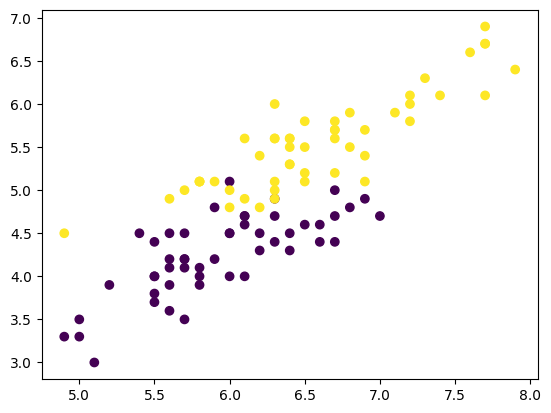

In [175]:
plt.scatter(df['sepal_length'], df['petal_length'], c=df['species'])

In [176]:
df = df.sample(100)
df_train = df.iloc[:60, :].sample(10)
df_val = df.iloc[60:80, :].sample(5)
df_test = df.iloc[80:, :].sample(5)

In [177]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [178]:
y_test

array([1, 2, 2, 2, 1])

In [179]:
df_bag = df_train.sample(8, replace=True)
X = df_bag.iloc[:, 0:2]
y = df_bag.iloc[:, -1]
df_bag

,sepal_length,petal_length,species
68,6.2,4.5,1
68,6.2,4.5,1
57,4.9,3.3,1
68,6.2,4.5,1
148,6.2,5.4,2
117,7.7,6.7,2
122,7.7,6.7,2
122,7.7,6.7,2


In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [181]:
dt_bag1 = DecisionTreeClassifier()

In [189]:
def evaluate(clf, X, y):
    clf.fit(X,y)
    plot_tree(clf)
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test, y_pred))

1.0


E:\ML-Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
E:\ML-Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


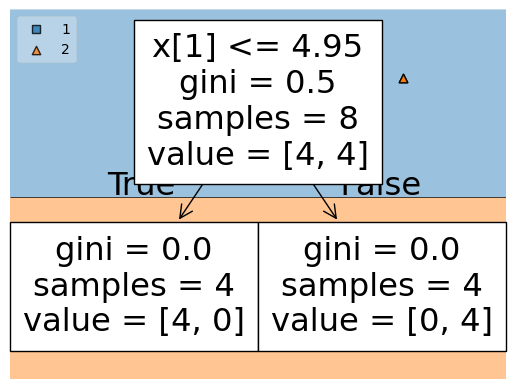

In [188]:
evaluate(dt_bag1, X, y)